In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
df = pd.read_csv('ESSdata_Thinkful.csv')

In [5]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [8]:
countries = df.cntry.unique().tolist()

## 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

I will use an  A/B test with paired samples t-test where the participants experience both versions. If the distribution is not normal, I will use Wilcoxon signed-rank test.

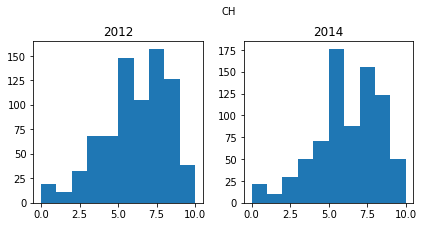

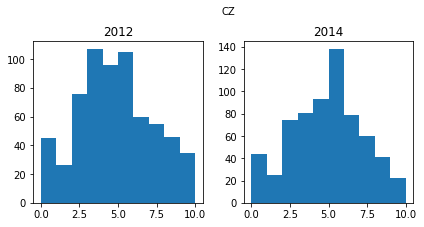

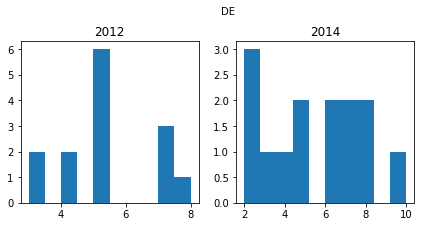

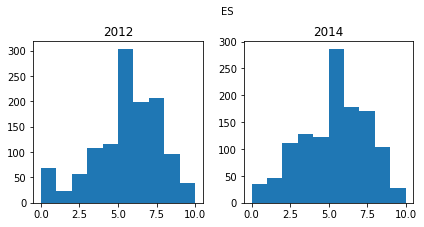

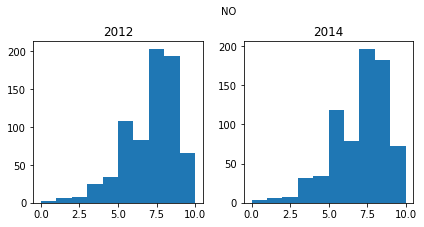

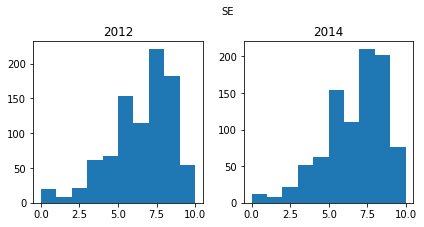

In [90]:
for country in countries:
    fig, axs = plt.subplots(1, 2, figsize=(6,3))
    
    axs[0].hist(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)].dropna())
    axs[1].hist(df['ppltrst'][(df['cntry'] == country) & (df['year']==7)].dropna())
    
    fig.text(0.52, 1, country)
    axs[0].set_title('2012')
    axs[1].set_title('2014')
    
    plt.tight_layout()

In [32]:
for country in countries:
    print('\n', country)
    print('2012 Mean: {0:.2f}'.format(df['ppltrst'][(df['cntry']==country) & (df['year']==6)].mean()))
    print('2014 Mean: {0:.2f}'.format(df['ppltrst'][(df['cntry']==country) & (df['year']==7)].mean()))
    print(stats.ttest_rel(df['ppltrst'][(df['cntry']==country) & (df['year']==6)],
                         df['ppltrst'][(df['cntry']==country) & (df['year']==7)],
                         nan_policy ='omit'))


 CH
2012 Mean: 5.68
2014 Mean: 5.75
Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)

 CZ
2012 Mean: 4.36
2014 Mean: 4.42
Ttest_relResult(statistic=-0.5001638336887216, pvalue=0.617129268240474)

 DE
2012 Mean: 5.21
2014 Mean: 5.36
Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)

 ES
2012 Mean: 5.11
2014 Mean: 4.90
Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725320272)

 NO
2012 Mean: 6.65
2014 Mean: 6.60
Ttest_relResult(statistic=0.5073077081124404, pvalue=0.61209257015177)

 SE
2012 Mean: 6.06
2014 Mean: 6.26
Ttest_relResult(statistic=-2.0671082026033982, pvalue=0.03900781670958545)


From the results above, we can see that there were significant differences in trust levels in ES(Spain) and SE(Sweden).

In [40]:
print('DE Non-Parametric:')
print('2012 Median: {0:.2f}'.format(df['ppltrst'][(df['cntry']=='DE') & (df['year']==6)].median()))
print('2014 Median: {0:.2f}'.format(df['ppltrst'][(df['cntry']=='DE') & (df['year']==7)].median()))
print(stats.wilcoxon(df['ppltrst'][(df['cntry']=='DE') & (df['year']==6)],
                         df['ppltrst'][(df['cntry']=='DE') & (df['year']==7)],
                          zero_method = 'wilcox'))

DE Non-Parametric:
2012 Median: 5.00
2014 Median: 5.50
WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)


In DE(Germany), there was no sigficant difference in trust level, even though it slightly increased.

## 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

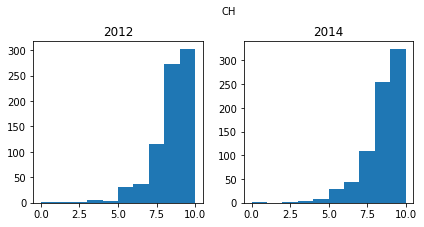

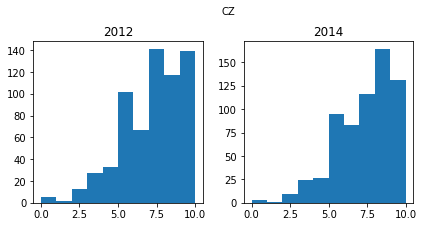

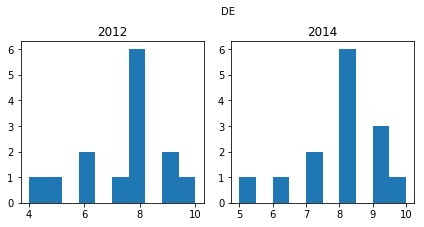

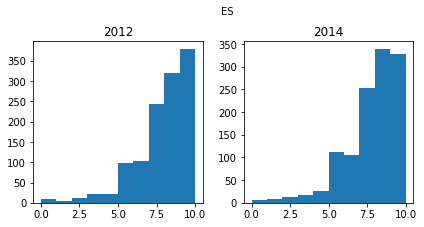

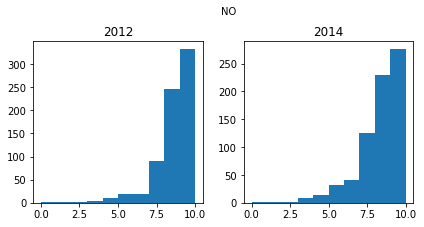

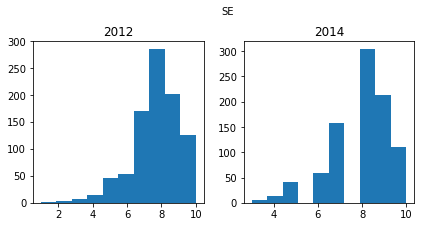

In [89]:
for country in countries:
    fig, axs = plt.subplots(1, 2, figsize=(6,3))
    
    axs[0].hist(df['happy'][(df['cntry'] == country) & (df['year']==6)].dropna())
    axs[1].hist(df['happy'][(df['cntry'] == country) & (df['year']==7)].dropna())
    
    fig.text(0.52, 1, country)
    axs[0].set_title('2012')
    axs[1].set_title('2014')
    
    plt.tight_layout()

The distributions are all skewed, so I will use non-parametric methods.

In [42]:
for country in countries:
    print('\n', country)
    print('2012 median: {0:.2f}'.format(df['happy'][(df['cntry'] == 'DE') & (df['year']==6)].median()))
    print('2014 median: {0:.2f}'.format(df['happy'][(df['cntry'] == 'DE') & (df['year']==7)].median()))  
    print(stats.wilcoxon(df['happy'][(df['cntry'] == country) & (df['year']==6)], 
                         df['happy'][(df['cntry'] == country) & (df['year']==7)],
                         zero_method='wilcox'
                        ))


 CH
2012 median: 8.00
2014 median: 8.00
WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)

 CZ
2012 median: 8.00
2014 median: 8.00
WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)

 DE
2012 median: 8.00
2014 median: 8.00
WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)

 ES
2012 median: 8.00
2014 median: 8.00
WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)

 NO
2012 median: 8.00
2014 median: 8.00
WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)

 SE
2012 median: 8.00
2014 median: 8.00
WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)


c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


As we can see above, there were significant differences in happiness in CZ and ES. 

In [43]:
print('Parametric')
for country in countries:
    print('\n', country)
    print('2012 mean: {0:.2f}'.format(df['happy'][(df['cntry'] == 'DE') & (df['year']==6)].mean()))
    print('2014 mean: {0:.2f}'.format(df['happy'][(df['cntry'] == 'DE') & (df['year']==7)].mean()))  
    print(stats.ttest_rel(df['happy'][(df['cntry'] == country) & (df['year']==6)], 
                          df['happy'][(df['cntry'] == country) & (df['year']==7)],
                          nan_policy='omit'
                         ))

Parametric

 CH
2012 mean: 7.43
2014 mean: 7.86
Ttest_relResult(statistic=-0.319412957862232, pvalue=0.7495001355429063)

 CZ
2012 mean: 7.43
2014 mean: 7.86
Ttest_relResult(statistic=-1.4561384833039597, pvalue=0.1458454843389451)

 DE
2012 mean: 7.43
2014 mean: 7.86
Ttest_relResult(statistic=-0.8062257748298549, pvalue=0.4346138707734991)

 ES
2012 mean: 7.43
2014 mean: 7.86
Ttest_relResult(statistic=1.613832417735418, pvalue=0.10682451556479494)

 NO
2012 mean: 7.43
2014 mean: 7.86
Ttest_relResult(statistic=4.2856826576235925, pvalue=2.067453013405473e-05)

 SE
2012 mean: 7.43
2014 mean: 7.86
Ttest_relResult(statistic=-0.5581637086030012, pvalue=0.5768709591233714)


I used t tests in order to the compare the mean values in happiness for each country from 2012 to 2014. This way we can tell if happiness increased, decreased, or stayed the same. Using a t-test, it seems that there were significant changes in happiness levels.

## 3. Who reported watching more TV in 2012, men or women?

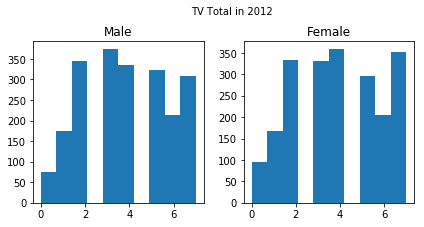

In [88]:
males = df['tvtot'][(df['gndr'] == 1) & (df['year'] == 6)]
females = df['tvtot'][(df['gndr'] == 2) & (df['year'] ==6)]

fig, axs = plt.subplots(1, 2, figsize=(6,3))
axs[0].hist(males.dropna())
axs[1].hist(females.dropna())

fig.text(0.45, 1, 'TV Total in 2012')
axs[0].set_title('Male')
axs[1].set_title('Female')
plt.tight_layout()

I will use A/B t-test for independent samples.

In [62]:
print('Male mean: {0:.2f}'.format(males.mean()))
print('Female mean: {0:.2f}'.format(females.mean()))
print(stats.ttest_ind(males, females, nan_policy='omit'))

Male mean: 3.90
Female mean: 3.94
Ttest_indResult(statistic=-0.6899928109209502, pvalue=0.49023604027095813)


From the results above, it seems that there was no significant difference in total tv time in 2012 between males and females.

## 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [63]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


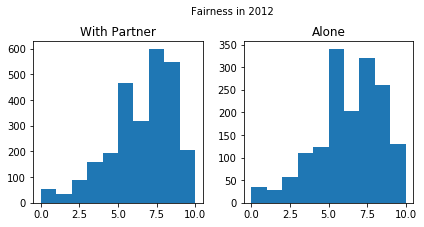

In [86]:
partner = df['pplfair'][(df['partner'] == 1.0) & (df['year'] == 6)]
alone = df['pplfair'][(df['partner'] == 2.0) & (df['year'] == 6)]

fig, axs = plt.subplots(1, 2 , figsize = (6,3))

axs[0].hist(partner.dropna())
axs[1].hist(alone.dropna())

fig.text(0.45, 1, 'Fairness in 2012')
axs[0].set_title('With Partner')
axs[1].set_title('Alone')
    
plt.tight_layout()

I will use A/B t-test for independent samples.

In [73]:
print('With Partner mean: {0:.2f}'.format(partner.mean()))
print('Alone mean: {0:.2f}'.format(alone.mean()))
print(stats.ttest_ind(partner, alone, nan_policy='omit'))

With Partner mean: 6.08
Alone mean: 5.86
Ttest_indResult(statistic=3.3201033970362084, pvalue=0.0009073952609876207)


It seems that in 2012, people living with a partner were more likely to believe in fairness that those living alone.

## 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [75]:
#DE, ES, and NO
DE_scl = df['sclmeet'][(df['cntry'] == 'DE') & (df['year'] == 7)].dropna()
ES_scl = df['sclmeet'][(df['cntry'] == 'ES') & (df['year'] == 7)].dropna()
NO_scl = df['sclmeet'][(df['cntry'] == 'NO') & (df['year'] == 7)].dropna()

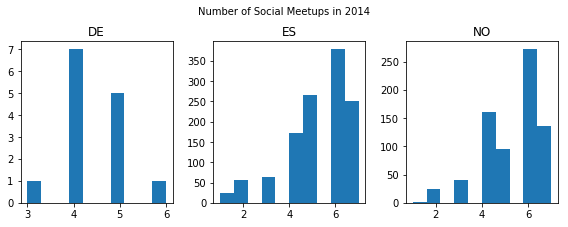

In [85]:
fig, axs =plt.subplots(1, 3, figsize=(8,3))

axs[0].hist(DE_scl)
axs[1].hist(ES_scl)
axs[2].hist(NO_scl)

fig.text(0.35, 1, 'Number of Social Meetups in 2014')
axs[0].set_title('DE')
axs[1].set_title('ES')
axs[2].set_title('NO')

plt.tight_layout()

This is a A/B/C/… test experiment with three or more independent groups, so I will use One-way ANOVA test.

In [92]:
F, p = stats.f_oneway(DE_scl, ES_scl, NO_scl)
print('F stat:', F, '\np-value:', p)

F stat: 2.6748003408062315 
p-value: 0.0691730703251696


In [94]:
print('DE numbers of meetups:', DE_scl.count())
print('ES numbers of meetups:', ES_scl.count())
print('NO numbers of meetups:', NO_scl.count())

DE numbers of meetups: 14
ES numbers of meetups: 1211
NO numbers of meetups: 731


From the the results above, we can see that there were significant differences in number of meetups between the three countries. 

## 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others in their age, in 2014. Are there any differences? If so, which countries stand out?

In [95]:
#DE, ES, and NO
DE_act = df['sclact'][(df['cntry'] == 'DE') & (df['year'] == 7)].dropna()
ES_act = df['sclact'][(df['cntry'] == 'ES') & (df['year'] == 7)].dropna()
NO_act = df['sclact'][(df['cntry'] == 'NO') & (df['year'] == 7)].dropna()

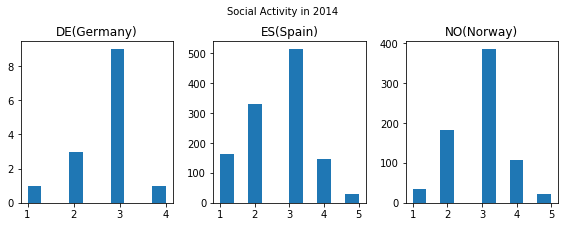

In [97]:
fig, axs =plt.subplots(1, 3, figsize=(8,3))

axs[0].hist(DE_act)
axs[1].hist(ES_act)
axs[2].hist(NO_act)

fig.text(0.4, 1, 'Social Activity in 2014')
axs[0].set_title('DE(Germany)')
axs[1].set_title('ES(Spain)')
axs[2].set_title('NO(Norway)')

plt.tight_layout()

In [98]:
F, p = stats.f_oneway(DE_act, ES_act, NO_act)
print('F stat:', F, '\np-value:', p)

F stat: 16.120374657928497 
p-value: 1.1400714087533104e-07


In [100]:
print('DE activity:', DE_act.count())
print('ES activity:', ES_act.count())
print('NO activity:', NO_act.count())

DE activity: 14
ES activity: 1185
NO activity: 731


Based on the results from the ANOVA test, it seems that there are sigfincant differences in number of social activities between Germany, Spain, and Norway in 2014.